In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SRGAN_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [3]:
model = hub.load(SRGAN_MODEL_PATH)

In [4]:
def download_image(url):
    """
    Download image from URL
    """
    content = requests.get(url).content
    image_array = np.asarray(bytearray(content), dtype=np.uint8)
    image = cv2.cvtColor(cv2.imdecode(image_array, -1), cv2.COLOR_BGR2RGB)
    
    return image

In [5]:
def plot_image(image):
    plt.figure(figsize=(10,10))
    plt.title(image.shape)
    plt.imshow(image)
    plt.show()

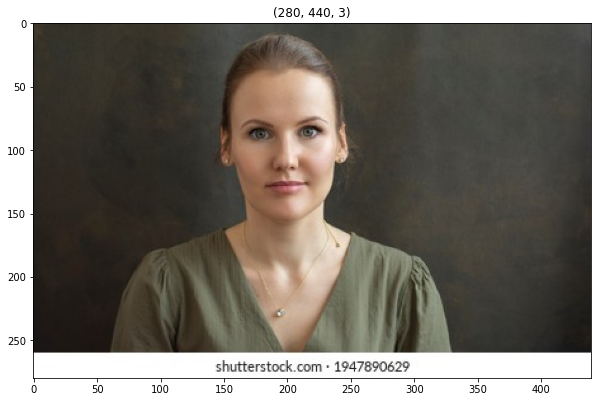

In [6]:
url = "https://image.shutterstock.com/image-photo/beautiful-young-girl-on-dark-260nw-1947890629.jpg"
test_image = download_image(url)
plot_image(test_image)


In [7]:
def preprocess_image(image):
    """
    Pre process image for model
    """
    image_size = (tf.convert_to_tensor(test_image.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, image_size[0], image_size[1])
    new_image = tf.cast(cropped_image, tf.float32)
    
    return tf.expand_dims(new_image, 0)

In [8]:
def run(image):
    """
    Run super resolution model
    """
    preprocessed_image = preprocess_image(image)
    new_image = model(preprocessed_image)
    return tf.squeeze(new_image) / 255.0

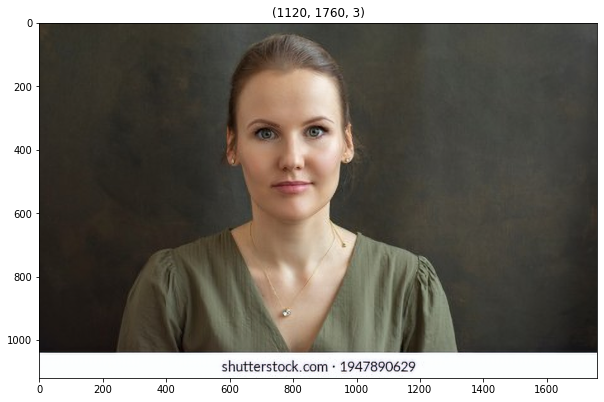

In [9]:
fake_image = run(test_image)
plot_image(fake_image)

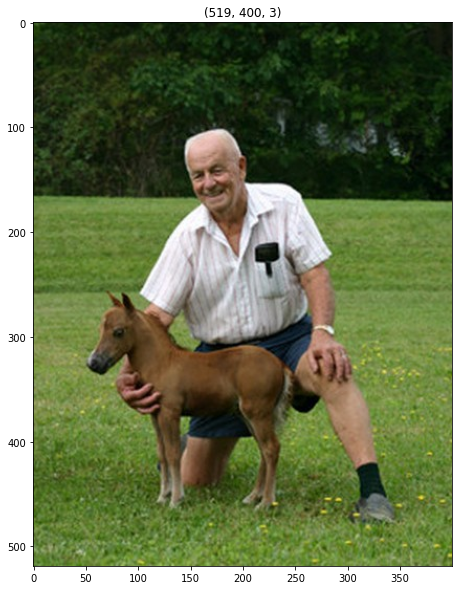

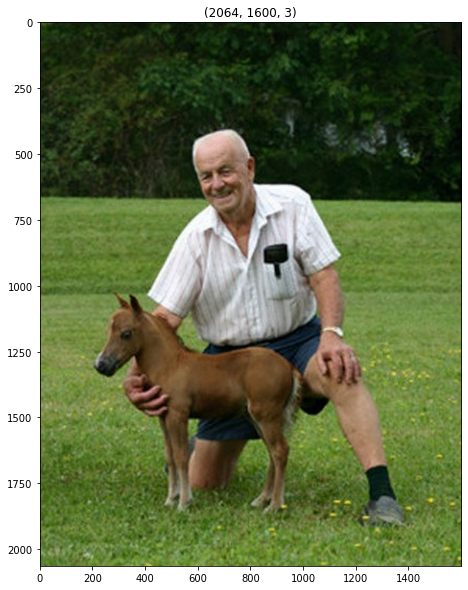

In [10]:
url = "https://www.weirdworm.com/wp-content/uploads/2010/03/miniature-horses01.jpg"
test_image = download_image(url)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)

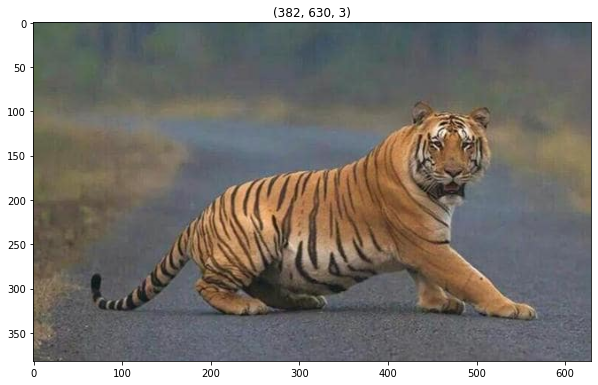

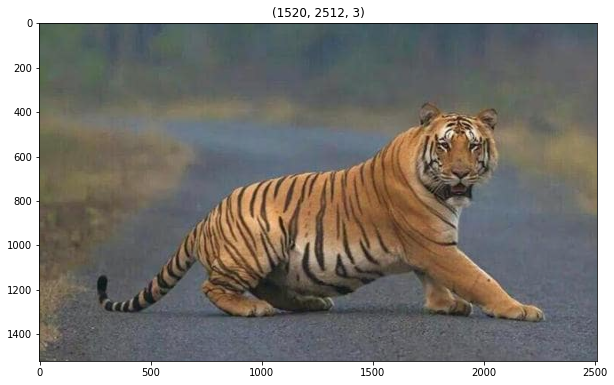

In [11]:
url = "https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2016/12/21/Pictures/tiger-missing-from-nagpur-forest_db1c2006-c74b-11e6-9f83-7f3d2f12db63.jpg"
test_image = download_image(url)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)
